In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [63]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [64]:
header=["age","gender","bmi","no_of_children","smoker","region","charges"]

In [65]:
df = pd.read_csv(path,names=header)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [66]:
df.value_counts()

age  gender  bmi     no_of_children  smoker  region  charges    
25   1       42.130  1               0       4       3238.43570     4
21   1       34.600  0               0       3       2020.17700     4
26   2       46.530  1               0       4       2927.06470     4
27   2       42.130  0               1       4       39611.75770    4
19   2       30.590  0               0       1       1639.56310     4
                                                                   ..
20   1       28.975  0               ?       1       2257.47525     1
?    1       31.920  2               0       1       7209.49180     1
     2       24.510  2               0       1       6710.19190     1
             29.600  4               0       3       7512.26700     1
             29.925  1               1       2       22462.04375    1
Name: count, Length: 1348, dtype: int64

In [67]:
df.replace('?',np.nan,inplace=True)

In [68]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [71]:
df[["age"]] = df[["age"]].astype("float")
avg_age=df["age"].mean()
print(avg_age)

39.10982658959538


In [72]:
df["age"]=df["age"].replace(np.nan,avg_age)

In [74]:
df[["age"]] = df[["age"]].astype("int")


In [75]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [76]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [82]:
df[["smoker"]] = df[["smoker"]].astype("float")


In [83]:
most_freq_smoker=df["smoker"].value_counts().idxmax()
print(most_freq_smoker)

0.0


In [84]:
df.fillna({"smoker":most_freq_smoker},inplace=True)

In [85]:
df[["smoker"]] = df[["smoker"]].astype("int")


In [86]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [87]:
df.describe()

,age,gender,bmi,no_of_children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,1.507215,30.701349,1.101732,0.203463,2.559885,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.130761,12151.768945
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4687.797000
50%,39.000000,2.000000,30.447500,1.000000,0.000000,3.000000,9333.014350
75%,51.000000,2.000000,34.770000,2.000000,0.000000,4.000000,16577.779500
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [88]:
df.duplicated().sum()

np.int64(1435)

In [89]:
df[df.duplicated()] # here it means whatever is duplicated is just coincendce that same people 
# got same age and are smokers

,age,gender,bmi,no_of_children,smoker,region,charges
581,19,2,30.590,0,0,1,1639.56310
1338,23,2,34.400,0,0,3,1826.84300
1339,56,1,39.820,0,0,4,11090.71780
1340,27,2,42.130,0,1,4,39611.75770
1341,19,2,24.600,1,0,3,1837.23700
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [90]:
df.index.duplicated().sum()

np.int64(0)

In [91]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


(0.0, 66902.85800000001)

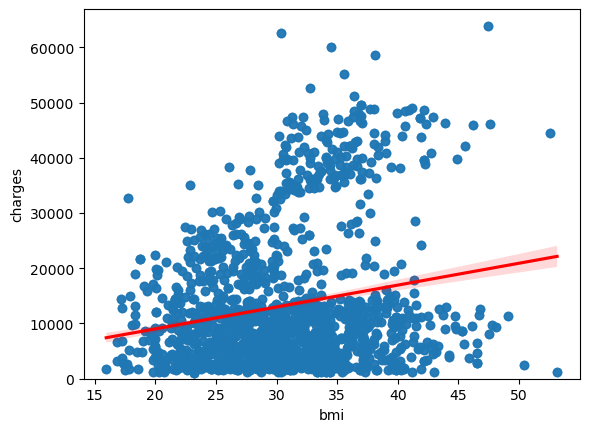

In [92]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

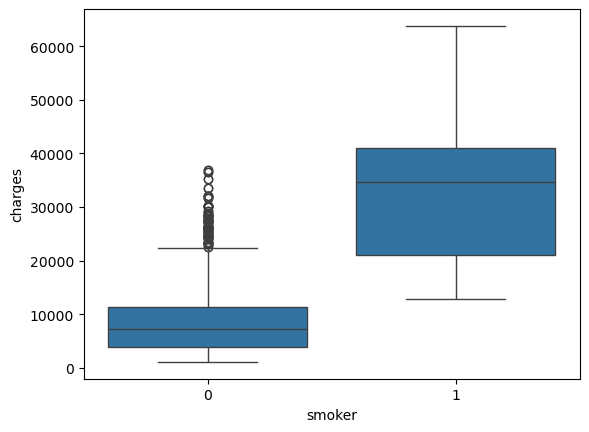

In [94]:
# Create a boxplot between charges and smoker columns
sns.boxplot(x='smoker', y='charges', data=df)


In [95]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


In [97]:
from scipy import stats

# Only iterate through numeric columns for correlation with charges
for param in df.select_dtypes(include=[np.number]).columns:
    # Skip if the column is 'charges' itself
    if param != 'charges':
        pearson_coef, p_value = stats.pearsonr(df[param], df['charges'])
        print(param)
        print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

age
The Pearson Correlation Coefficient for age is 0.29862366165523724 with a P-value of P = 3.3160850120110425e-58
gender
The Pearson Correlation Coefficient for gender is 0.06283683634000764 with a P-value of P = 0.0009325425283975804
bmi
The Pearson Correlation Coefficient for bmi is 0.19984605168370884 with a P-value of P = 2.29351916547895e-26
no_of_children
The Pearson Correlation Coefficient for no_of_children is 0.06644232390285765 with a P-value of P = 0.00046444766841148387
smoker
The Pearson Correlation Coefficient for smoker is 0.7887833500983769 with a P-value of P = 0.0
region
The Pearson Correlation Coefficient for region is 0.0540575317416052 with a P-value of P = 0.004414508249390473


In [101]:
# linear regression model used to predict the charges value, just by using the smoker attribute
X = df[['smoker']]     # predictor
y = df['charges']      # target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the charges
y_pred = model.predict(X)

# Compute R² score
print(model.score(X, y))


0.6221791733924185


In [99]:
y_pred[0:5]

array([32223.13982269,  8417.87439312,  8417.87439312,  8417.87439312,
        8417.87439312])

In [118]:
#multiple linear reg with all attributes
x=df.drop('charges',axis=1)
y=df["charges"]

model = LinearRegression()
model.fit(x, y)
y_pred=model.predict(x)
print(model.score(x,y))

0.7504083820289634


In [119]:
y_pred[0:5]

array([25652.47075054,  3441.45424213,  6740.67295264,  4125.84435892,
        5897.76335859])

In [120]:
#we can see that the score is higher now

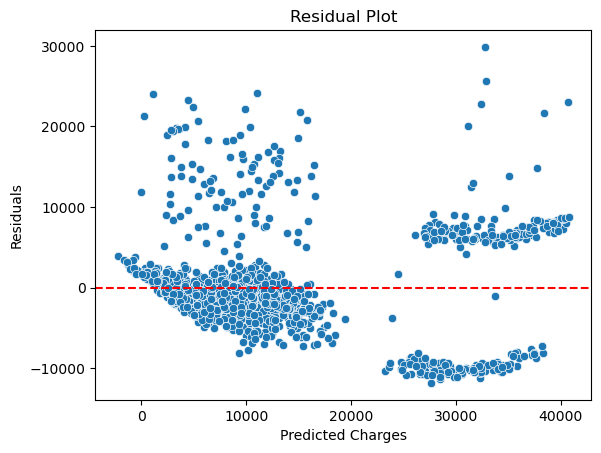

In [124]:
#compare the residuals with predicted
# y_true = actual charges
# y_pred = predicted charges
residuals = y - y_pred

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [122]:
# we can see that there are clusters so it's not linear 
# bc the points are not randomly around the x-axis

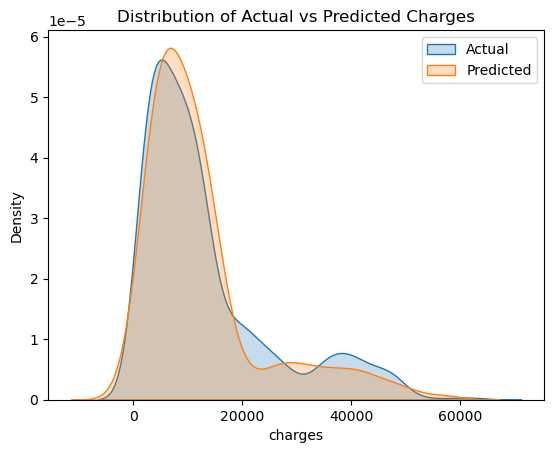

In [154]:
#compare the actual vs predicted
sns.kdeplot(y, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title("Distribution of Actual vs Predicted Charges")
plt.legend()
plt.show()

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # normalize features
    ('poly', PolynomialFeatures(degree=2)),   # add polynomial & interaction terms
    ('model', LinearRegression())             # linear regression model
])

#  Fit the pipeline on training data
pipeline.fit(x_train, y_train)

# Predict on test data
y_pred = pipeline.predict(x_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print("R² score with PolynomialFeatures:", r2)

R² score with PolynomialFeatures: 0.8339487781545039


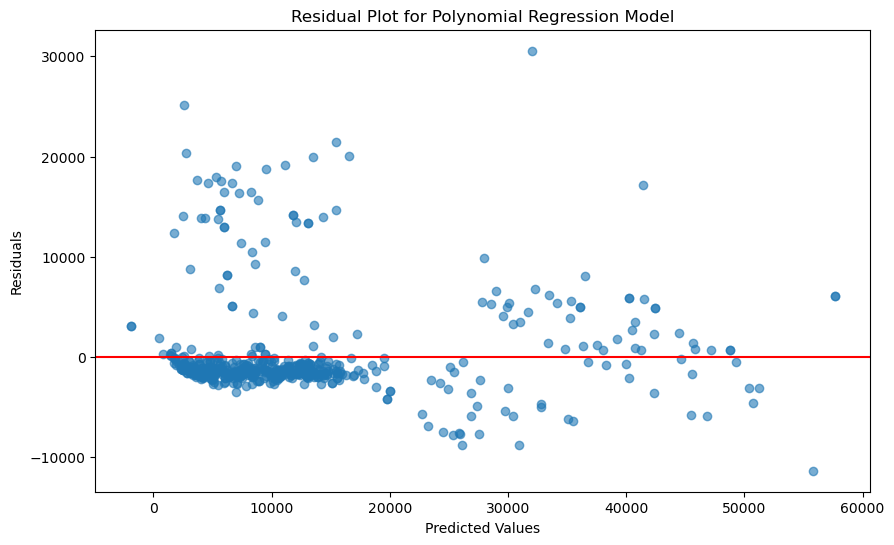

In [159]:
# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Polynomial Regression Model')
plt.show()



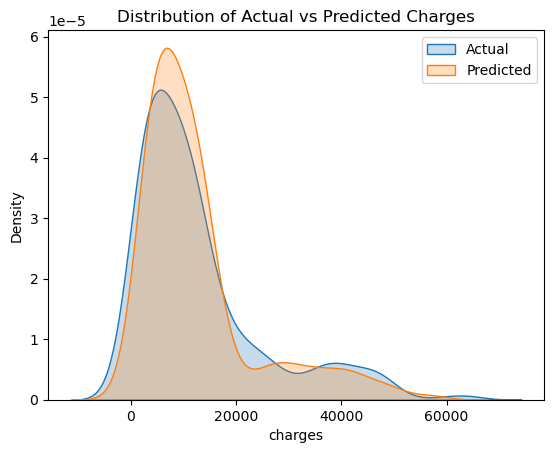

In [128]:
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.title("Distribution of Actual vs Predicted Charges")
plt.legend()
plt.show()

In [148]:
def evaluate_model(model, name):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R² score: {r2:.4f}")

In [149]:
#this shows that there is no overfitting 
evaluate_model(LinearRegression(), "Linear Regression")
evaluate_model(Ridge(alpha=0.1), "Ridge Regression")

Linear Regression R² score: 0.8339
Ridge Regression R² score: 0.8339


In [141]:
# only ridge regression without pipeline /scaler/or poly features
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7395716463230875


In [153]:
# using grid which choose the best ooptions for us like poly deg and alpha
# also the cross valdiation value depend on how many rows we have 
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4],       # test degrees 1–4
    'ridge__alpha': [0.1, 1, 10, 100]   # test different regularization strengths
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print("Best degree:", grid.best_params_['poly__degree'])
print("Best alpha:", grid.best_params_['ridge__alpha'])
print("Best CV R²:", grid.best_score_)

Best degree: 3
Best alpha: 100
Best CV R²: 0.8459855816555889
